In [18]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from nilearn.datasets import fetch_abide_pcp
# Fetch the full data and update phenotypic data and cross_validation
abide = fetch_abide_pcp(derivatives = ['func_preproc'], pipeline = 'cpac', quality_checked = True)
y = abide.phenotypic['DX_GROUP']
y[y == 2] = 0
atlas = 'Power'

Extract signals on spheres from Power atlas
---------------------------------------------------------------

In [7]:
from nilearn import datasets
power = datasets.fetch_coords_power_2011()
print('Power atlas comes with {0}.'.format(power.keys()))

Power atlas comes with dict_keys(['rois', 'description']).


In [8]:
# Compute within spheres averaged time-series
# -------------------------------------------
# We collect the regions coordinates in a numpy array

import numpy as np

coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

print('Stacked power coordinates in array of shape {0}.'.format(coords.shape))

Stacked power coordinates in array of shape (264, 3).


In [10]:
from nilearn import input_data
spheres_masker = input_data.NiftiSpheresMasker(
    seeds=coords, smoothing_fwhm=6, radius=5.,
    detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2)


time_series_power = []
for i in range(len(abide.func_preproc)):
    print("iteration: "+str(i))
    time_series_power.append(spheres_masker.fit_transform(abide.func_preproc[i]))

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

iteration: 554
iteration: 555
iteration: 556
iteration: 557
iteration: 558
iteration: 559
iteration: 560
iteration: 561
iteration: 562
iteration: 563
iteration: 564
iteration: 565
iteration: 566
iteration: 567
iteration: 568
iteration: 569
iteration: 570
iteration: 571
iteration: 572
iteration: 573
iteration: 574
iteration: 575
iteration: 576
iteration: 577
iteration: 578
iteration: 579
iteration: 580
iteration: 581
iteration: 582
iteration: 583
iteration: 584
iteration: 585
iteration: 586
iteration: 587
iteration: 588
iteration: 589
iteration: 590
iteration: 591
iteration: 592
iteration: 593
iteration: 594
iteration: 595
iteration: 596
iteration: 597
iteration: 598
iteration: 599
iteration: 600
iteration: 601
iteration: 602
iteration: 603
iteration: 604
iteration: 605
iteration: 606
iteration: 607
iteration: 608
iteration: 609
iteration: 610
iteration: 611
iteration: 612
iteration: 613
iteration: 614
iteration: 615
iteration: 616
iteration: 617
iteration: 618
iteration: 619
iteration:

In [11]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score
scoring = {
    'accuracy':    make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [12]:
correlation = 'correlation'
partial = 'partial correlation'
tangent = 'tangent'

lr = "LR"
lsvm = "LSVM"
ksvm = "kSVM"
rf = "RF"
ab = "AB"


measure = [correlation, partial, tangent]

In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_corr = LogisticRegression(C = 0.01)
lr_part = LogisticRegression(C = 1)
lr_tang = LogisticRegression(C = 1)

In [15]:
# Linear SVM
from sklearn.svm import SVC

lsvm_corr = SVC(kernel='linear',C = 0.01)
lsvm_part = SVC(kernel='linear',C = 0.1)
lsvm_tang = SVC(kernel='linear',C = 0.01)

In [16]:
# Kernel SVM

ksvm_corr = SVC(gamma = 'auto', C = 100)
ksvm_part = SVC(gamma = 'auto', C = 1000)
ksvm_tang = SVC(gamma = 'auto', C = 100)

In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_corr = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_part = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_tang = RandomForestClassifier(max_depth = 6, random_state = 0)

In [18]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

ab_corr = AdaBoostClassifier(n_estimators = 100)
ab_part = AdaBoostClassifier(n_estimators = 100)
ab_tang = AdaBoostClassifier(n_estimators = 100)

In [19]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

=========================================================
# Logistic Regression
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [21]:
# Correlation
from crossvalidation import CrossValidation

[X_lr_corr, lr_corr_scores] = CrossValidation(lr_corr, correlation, y, skf, time_series_power)
[X_lr_part, lr_part_scores] = CrossValidation(lr_part, partial,     y, skf, time_series_power)
[X_lr_tang, lr_tang_scores] = CrossValidation(lr_tang, tangent,     y, skf, time_series_power)


C:\Users\xyang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xyang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [22]:
from scores import getScores
[lr_corr_acc, lr_corr_sen, lr_corr_spe] = getScores(lr_corr_scores)
[lr_part_acc, lr_part_sen, lr_part_spe] = getScores(lr_part_scores)
[lr_tant_acc, lr_tang_sen, lr_tang_spe] = getScores(lr_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

In [23]:
from roc import plotROC

C:\Users\xyang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xyang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

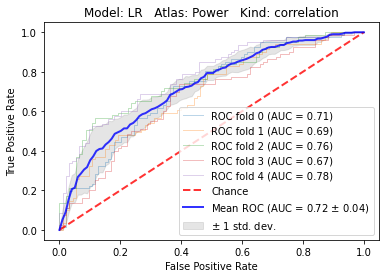

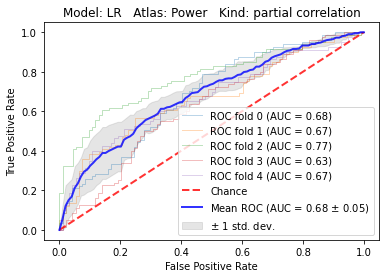

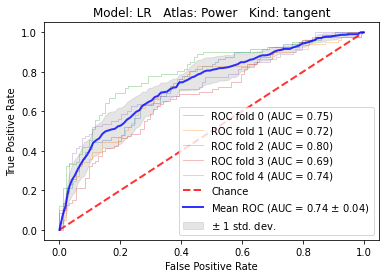

In [25]:
import matplotlib.pylab as pl

plotROC(lr_corr, X_lr_corr, y, skf, atlas, correlation, lr)
plotROC(lr_part, X_lr_part, y, skf, atlas, partial, lr)
plotROC(lr_tang, X_lr_tang, y, skf, atlas, tangent, lr)

=========================================================
# Linear SVM
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [26]:
# Correlation
from crossvalidation import CrossValidation

[X_lsvm_corr, lsvm_corr_scores] = CrossValidation(lsvm_corr, correlation, y, skf, time_series_power)
[X_lsvm_part, lsvm_part_scores] = CrossValidation(lsvm_part, partial,     y, skf, time_series_power)
[X_lsvm_tang, lsvm_tang_scores] = CrossValidation(lsvm_tang, tangent,     y, skf, time_series_power)


In [27]:
from scores import getScores
[lsvm_corr_acc, lsvm_corr_sen, lsvm_corr_spe] = getScores(lsvm_corr_scores)
[lsvm_part_acc, lsvm_part_sen, lsvm_part_spe] = getScores(lsvm_part_scores)
[lsvm_tant_acc, lsvm_tang_sen, lsvm_tang_spe] = getScores(lsvm_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

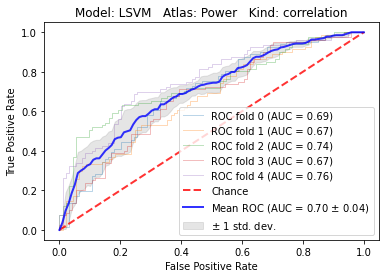

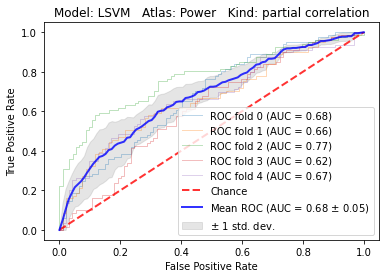

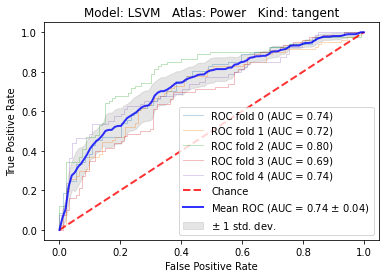

In [28]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(lsvm_corr, X_lsvm_corr, y, skf, atlas, correlation, lsvm)
plotROC(lsvm_part, X_lsvm_part, y, skf, atlas, partial, lsvm)
plotROC(lsvm_tang, X_lsvm_tang, y, skf, atlas, tangent, lsvm)

=========================================================
# Kernal SVM
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [29]:
# Correlation
from crossvalidation import CrossValidation

[X_ksvm_corr, ksvm_corr_scores] = CrossValidation(ksvm_corr, correlation, y, skf, time_series_power)
[X_ksvm_part, ksvm_part_scores] = CrossValidation(ksvm_part, partial,     y, skf, time_series_power)
[X_ksvm_tang, ksvm_tang_scores] = CrossValidation(ksvm_tang, tangent,     y, skf, time_series_power)


In [30]:
from scores import getScores
[ksvm_corr_acc, ksvm_corr_sen, ksvm_corr_spe] = getScores(ksvm_corr_scores)
[ksvm_part_acc, ksvm_part_sen, ksvm_part_spe] = getScores(ksvm_part_scores)
[ksvm_tant_acc, ksvm_tang_sen, ksvm_tang_spe] = getScores(ksvm_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

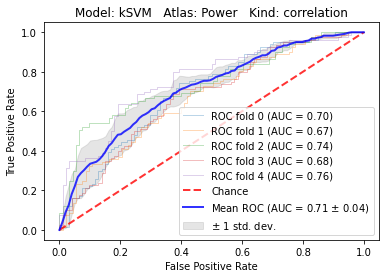

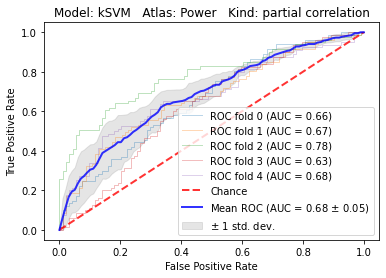

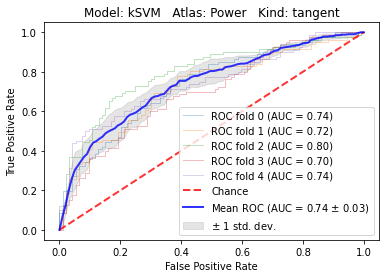

In [31]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(ksvm_corr, X_ksvm_corr, y, skf, atlas, correlation, ksvm)
plotROC(ksvm_part, X_ksvm_part, y, skf, atlas, partial, ksvm)
plotROC(ksvm_tang, X_ksvm_tang, y, skf, atlas, tangent, ksvm)

=========================================================
# Random Forest
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [32]:
# Correlation
from crossvalidation import CrossValidation

[X_rf_corr, rf_corr_scores] = CrossValidation(rf_corr, correlation, y, skf, time_series_power)
[X_rf_part, rf_part_scores] = CrossValidation(rf_part, partial,     y, skf, time_series_power)
[X_rf_tang, rf_tang_scores] = CrossValidation(rf_tang, tangent,     y, skf, time_series_power)


In [33]:
from scores import getScores
[rf_corr_acc, rf_corr_sen, rf_corr_spe] = getScores(rf_corr_scores)
[rf_part_acc, rf_part_sen, rf_part_spe] = getScores(rf_part_scores)
[rf_tant_acc, rf_tang_sen, rf_tang_spe] = getScores(rf_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

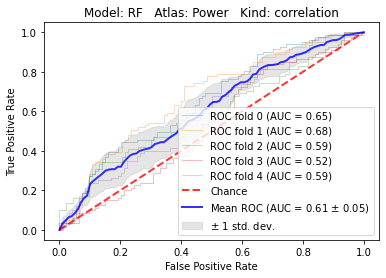

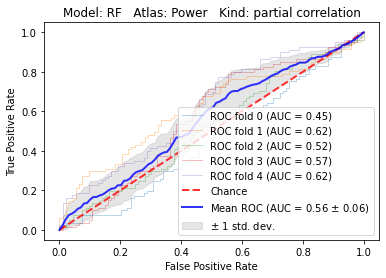

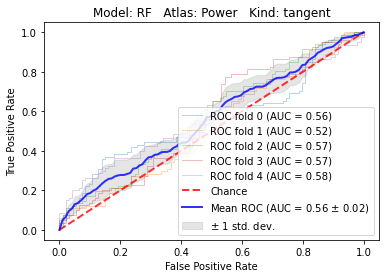

In [34]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(rf_corr, X_rf_corr, y, skf, atlas, correlation, rf)
plotROC(rf_part, X_rf_part, y, skf, atlas, partial, rf)
plotROC(rf_tang, X_rf_tang, y, skf, atlas, tangent, rf)

=========================================================
# Ada Boost
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [35]:
# Correlation
from crossvalidation import CrossValidation

[X_ab_corr, ab_corr_scores] = CrossValidation(ab_corr, correlation, y, skf, time_series_power)
[X_ab_part, ab_part_scores] = CrossValidation(ab_part, partial,     y, skf, time_series_power)
[X_ab_tang, ab_tang_scores] = CrossValidation(ab_tang, tangent,     y, skf, time_series_power)


In [36]:
from scores import getScores
[ab_corr_acc, ab_corr_sen, ab_corr_spe] = getScores(ab_corr_scores)
[ab_part_acc, ab_part_sen, ab_part_spe] = getScores(ab_part_scores)
[ab_tant_acc, ab_tang_sen, ab_tang_spe] = getScores(ab_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

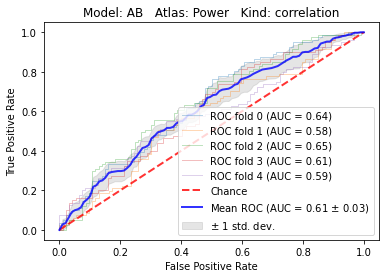

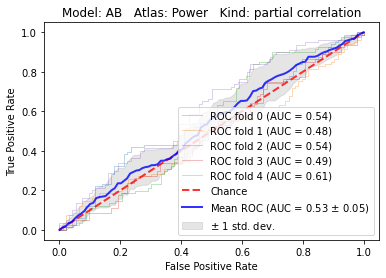

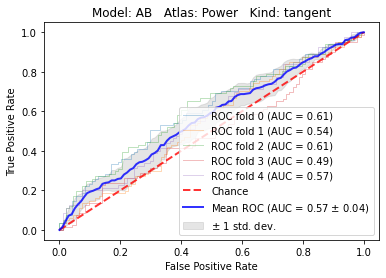

In [37]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(ab_corr, X_ab_corr, y, skf, atlas, correlation, ab)
plotROC(ab_part, X_ab_part, y, skf, atlas, partial, ab)
plotROC(ab_tang, X_ab_tang, y, skf, atlas, tangent, ab)

# Summary Results

In [38]:
from IPython.display import HTML, display

test=[["","","Correlation"," "," ","Parital Corr",""," ","Tangent",""],
      
      ["Classifier","Sensitivity","Specificity", "Accuracy",\
       "Sensitivity","Specificity", "Accuracy",\
       "Sensitivity","Specificity", "Accuracy"],
      
      ["LR",lr_corr_sen,lr_corr_spe,lr_corr_acc,\
       lr_part_sen,lr_part_spe,lr_part_acc,\
       lr_tang_sen,lr_tang_spe,lr_tant_acc
      ],
      
      ["lSVM",lsvm_corr_sen,lsvm_corr_spe,lsvm_corr_acc,\
       lsvm_part_sen,lsvm_part_spe,lsvm_part_acc,\
       lsvm_tang_sen,lsvm_tang_spe,lsvm_tant_acc
      ],
      
      ["kSVM",ksvm_corr_sen,ksvm_corr_spe,ksvm_corr_acc,\
       ksvm_part_sen,ksvm_part_spe,ksvm_part_acc,\
       ksvm_tang_sen,ksvm_tang_spe,ksvm_tant_acc
      ],
      
      ["RF",rf_corr_sen,rf_corr_spe,rf_corr_acc,\
       rf_part_sen,rf_part_spe,rf_part_acc,\
       rf_tang_sen,rf_tang_spe,rf_tant_acc
      ], 
      
      ["AB",ab_corr_sen,ab_corr_spe,ab_corr_acc,\
       ab_part_sen,ab_part_spe,ab_part_acc,\
       ab_tang_sen,ab_tang_spe,ab_tant_acc
      ]
     ]

print("Test:")
print("===========================================================================================")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in test))
))

Test:


,,Correlation,,,Parital Corr,,,Tangent,
Classifier,Sensitivity,Specificity,Accuracy,Sensitivity,Specificity,Accuracy,Sensitivity,Specificity,Accuracy
LR,57.06%,73.49%,65.90%,41.44%,80.80%,62.58%,56.31%,78.21%,68.09%
lSVM,59.29%,70.92%,65.56%,49.12%,77.58%,64.41%,58.29%,77.35%,68.54%
kSVM,61.27%,70.92%,66.48%,47.14%,78.01%,63.72%,57.80%,77.99%,68.66%
RF,35.71%,77.57%,58.20%,26.55%,77.14%,53.74%,21.60%,85.46%,55.91%
AB,51.85%,62.18%,57.41%,44.42%,57.05%,51.21%,49.38%,59.62%,54.87%
